<a href="https://colab.research.google.com/github/dheerajkumar5/Uber_Ride_Price_Prediction/blob/main/Uber_Ride_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [3]:
cab_df = pd.read_csv('Cab_rides_sample.csv')  # Load the cab rides dataset into a pandas DataFrame for analysis

In [4]:
cab_df.shape # Returns the dimensions of the DataFrame as a tuple (rows, columns)

(70000, 11)

In [5]:
cab_df.columns # Review columns

Index(['Unnamed: 0', 'distance', 'cab_type', 'time_stamp', 'destination',
       'source', 'price', 'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [6]:
cab_df.columns = ['S.no','Distance', 'Service', 'Time_stamp', 'Destination', 'Source', 'Price','Surge_multiplier', 'Id', 'Product_id', 'Cab_Type']
#Rename Columns to ensure they follow naming convention and ease of data manipulation

In [7]:
cab_df.columns

Index(['S.no', 'Distance', 'Service', 'Time_stamp', 'Destination', 'Source',
       'Price', 'Surge_multiplier', 'Id', 'Product_id', 'Cab_Type'],
      dtype='object')

In [8]:
cab_df = cab_df[['Distance','Time_stamp','Destination','Source','Price', 'Surge_multiplier','Cab_Type']] #access only required columns

In [9]:
cab_df.head() # Helps view top 5 rows of the dataset

,Distance,Time_stamp,Destination,Source,Price,Surge_multiplier,Cab_Type
0,1.89,1545085210334,Theatre District,Northeastern University,8.0,1.0,UberX
1,1.97,1543366102245,Theatre District,Northeastern University,13.5,1.0,Lyft XL
2,1.35,1543701476008,North End,Beacon Hill,NaN,1.0,Taxi
3,0.91,1544793611629,Beacon Hill,Haymarket Square,NaN,1.0,Taxi
4,1.23,1544851211219,West End,North End,13.5,1.0,Lux


In [10]:
cab_df.sample(10) # Randomly selects 10 rows from the DataFrame to preview a sample of the data

,Distance,Time_stamp,Destination,Source,Price,Surge_multiplier,Cab_Type
13574,2.16,1544795707088,Northeastern University,Theatre District,16.5,1.0,Lux
56751,1.35,1543364302013,Haymarket Square,Beacon Hill,16.5,1.0,Lux Black
60430,2.80,1544988008766,Boston University,West End,10.0,1.0,UberPool
36531,2.44,1543430486086,Beacon Hill,South Station,13.5,1.5,Lyft
20008,2.46,1543274474792,Beacon Hill,Fenway,9.5,1.0,WAV
23488,2.38,1544992803407,Beacon Hill,Northeastern University,11.0,1.5,Lyft
65482,4.55,1543581477709,Financial District,Northeastern University,14.5,1.0,UberPool
6370,1.11,1544983512225,North End,Financial District,13.5,1.0,Lux
45833,2.89,1543235890085,Boston University,West End,19.5,1.0,Lux
13822,2.37,1544828406700,South Station,Beacon Hill,32.5,1.0,Lux Black XL


In [11]:
cab_df.shape #Shape of the new dataset in use

(70000, 7)

In [12]:
cab_df.isnull().sum()  # Checks for missing (null) values in each column and sums them to identify attributes with missing data

,0
Distance,0
Time_stamp,0
Destination,0
Source,0
Price,5547
Surge_multiplier,0
Cab_Type,0


In [13]:
cab_df.describe() # Generates summary statistics for numerical columns in the DataFrame, including count, mean, standard deviation, min, max, and percentiles
# average price is ~16.50, with a maximum of 92 and a distance range of 0.02 to 7.86 miles

,Distance,Time_stamp,Price,Surge_multiplier
count,70000.000000,7.000000e+04,64453.000000,70000.000000
mean,2.182604,1.544049e+12,16.495722,1.012557
std,1.137910,6.902717e+08,9.273628,0.085427
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.270000,1.543445e+12,9.000000,1.000000
50%,2.150000,1.543738e+12,13.500000,1.000000
75%,2.910000,1.544831e+12,22.500000,1.000000
max,7.860000,1.545161e+12,92.000000,2.500000


<ipython-input-14-2687e1df825b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cab_df['Price'], hist = False)


<Axes: xlabel='Price', ylabel='Density'>

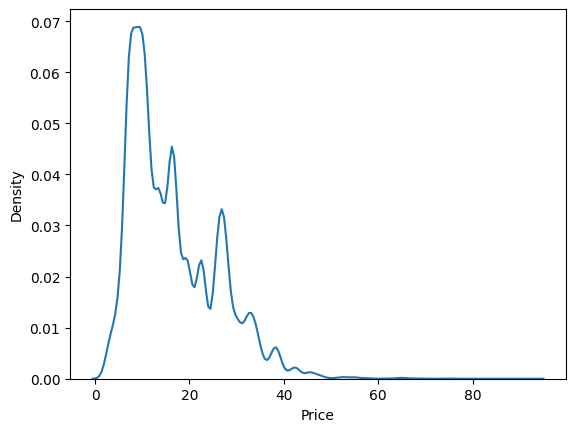

In [14]:
sns.distplot(cab_df['Price'], hist = False)
# Generates a distribution plot of ride prices to visualize how prices are spread, with peaks showing concentrations of frequent values

<ipython-input-15-c847d2572686>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cab_df['Price']) #with histplot


<Axes: xlabel='Price', ylabel='Density'>

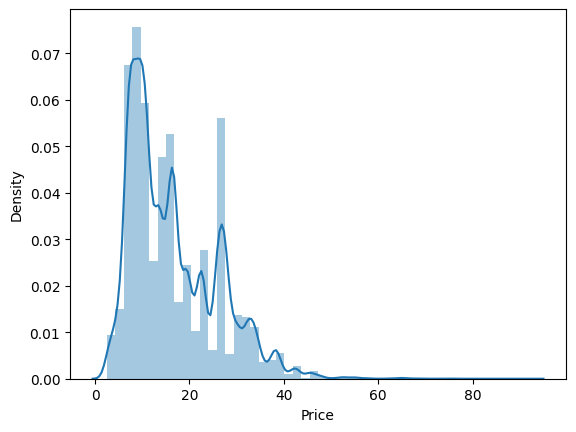

In [15]:
sns.distplot(cab_df['Price']) #with histplot

In [16]:
cab_df.loc[cab_df['Price'].isnull(), 'Price'] = cab_df['Price'].dropna().sample(cab_df['Price'].isnull().sum(), replace = True, random_state = 42).values
# Performs random imputation for missing values in 'Price' column
# ensuring the imputed values are sampled from existing non-missing data to preserve the original distribution

In [17]:
cab_df['Price'].isnull().sum() #non null values

np.int64(0)

In [18]:
cab_df['Price'].describe() #review mean, median std, min, max, quantiles to ensure data distribution is similar

,Price
count,70000.000000
mean,16.507745
std,9.276883
min,2.500000
25%,9.000000
50%,13.500000
75%,22.500000
max,92.000000


<ipython-input-19-35a9b4e116e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cab_df['Price'], hist = False)


<Axes: xlabel='Price', ylabel='Density'>

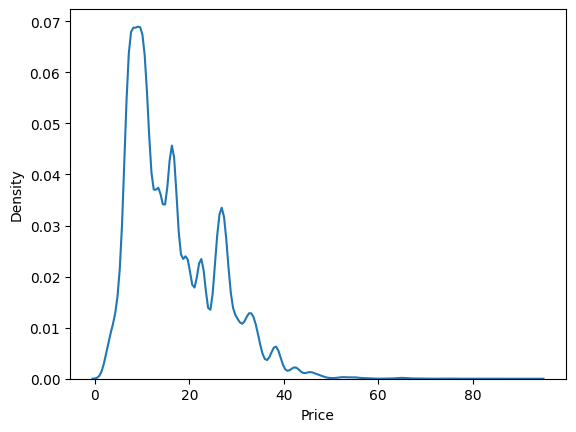

In [19]:
sns.distplot(cab_df['Price'], hist = False)
# Used random sampling for imputation to maintain the original distribution of the 'Price' column and avoid introducing bias

In [20]:
cab_df.isnull().sum() #Review & ensure no null values

,0
Distance,0
Time_stamp,0
Destination,0
Source,0
Price,0
Surge_multiplier,0
Cab_Type,0


In [21]:
weather_df = pd.read_csv('weather.csv')
# Load the weather dataset into a pandas DataFrame for analysis

In [22]:
weather_df.head()
#Top 5 rows to understand data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [23]:
weather_df.isnull().sum() #check for null values

,0
temp,0
location,0
clouds,0
pressure,0
rain,5382
time_stamp,0
humidity,0
wind,0


In [24]:
weather_df['rain'].fillna(0, inplace = True)
# Replaces missing values in the 'rain' column with 0, assuming no rain was recorded on days with null values

<ipython-input-24-b3fce59f200e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df['rain'].fillna(0, inplace = True)


In [25]:
weather_df.isnull().sum() #review null values

,0
temp,0
location,0
clouds,0
pressure,0
rain,0
time_stamp,0
humidity,0
wind,0


In [26]:
weather_df.columns #column names

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [27]:
weather_df.columns = ['Temp', 'Source', 'Clouds', 'Pressure', 'Rain', 'Time_stamp','Humidity', 'Wind']
#update column names

In [28]:
print(weather_df.columns)
print(cab_df.columns)

#common column that can be used to merge the data into one dataset

Index(['Temp', 'Source', 'Clouds', 'Pressure', 'Rain', 'Time_stamp',
       'Humidity', 'Wind'],
      dtype='object')
Index(['Distance', 'Time_stamp', 'Destination', 'Source', 'Price',
       'Surge_multiplier', 'Cab_Type'],
      dtype='object')


In [29]:
merged_file = cab_df.merge(weather_df, on = 'Source', how = 'inner')
## Merges cab ride and weather datasets on the 'Source' column using an inner join to retain only matching rows

In [30]:
merged_file.columns #Review column names

Index(['Distance', 'Time_stamp_x', 'Destination', 'Source', 'Price',
       'Surge_multiplier', 'Cab_Type', 'Temp', 'Clouds', 'Pressure', 'Rain',
       'Time_stamp_y', 'Humidity', 'Wind'],
      dtype='object')

In [42]:
merged_file.duplicated().sum() #Check for duplicates

np.int64(0)

In [ ]:
merged_file.drop_duplicates(inplace = True) #drop duplicated values

In [31]:
merged_file.shape

(36610000, 14)

In [32]:
merged_file.head() #review top 5 rows

,Distance,Time_stamp_x,Destination,Source,Price,Surge_multiplier,Cab_Type,Temp,Clouds,Pressure,Rain,Time_stamp_y,Humidity,Wind
0,1.89,1545085210334,Theatre District,Northeastern University,8.0,1.0,UberX,42.07,1.00,1012.12,0.1020,1545003901,0.78,11.28
1,1.89,1545085210334,Theatre District,Northeastern University,8.0,1.0,UberX,43.05,0.81,990.82,0.0000,1543347920,0.72,8.31
2,1.89,1545085210334,Theatre District,Northeastern University,8.0,1.0,UberX,43.87,1.00,1006.24,0.0284,1543277833,0.91,9.74
3,1.89,1545085210334,Theatre District,Northeastern University,8.0,1.0,UberX,39.10,0.83,996.10,0.0000,1543449727,0.67,10.66
4,1.89,1545085210334,Theatre District,Northeastern University,8.0,1.0,UberX,26.93,0.16,1033.40,0.0000,1544787901,0.81,2.94


In [33]:
df = merged_file[['Distance', 'Time_stamp_x','Destination', 'Source', 'Price','Surge_multiplier','Cab_Type','Temp','Clouds','Pressure','Rain','Time_stamp_y', 'Humidity', 'Wind']]
 # Creates a new DataFrame selecting specific columns from the merged dataset for further analysis and modeling

In [34]:
df = df.sample(300000, random_state = 42)
# Selects a random sample from the DataFrame to ensure manageable size while retaining representativeness

In [35]:
df.head() #review top 5 rows

,Distance,Time_stamp_x,Destination,Source,Price,Surge_multiplier,Cab_Type,Temp,Clouds,Pressure,Rain,Time_stamp_y,Humidity,Wind
11778379,2.78,1543525082110,West End,Fenway,10.5,1.0,Shared,28.67,0.27,1021.49,0.0,1544409634,0.60,5.02
8456629,0.58,1543256049895,North Station,Haymarket Square,9.0,1.0,Lyft XL,37.72,0.63,1001.80,0.0,1543481574,0.69,10.08
35139534,1.73,1544949909558,South Station,West End,26.0,1.0,Lux Black XL,40.84,0.87,1014.40,0.0,1543203644,0.93,1.52
13131279,2.17,1543699676262,South Station,North Station,10.5,1.0,UberX,46.79,0.86,1001.89,0.0,1543812774,0.94,2.68
31400493,1.71,1543361062078,West End,South Station,11.0,1.0,Lyft,28.78,0.11,1022.19,0.0,1544400501,0.61,5.19


In [36]:
df.sample(5) #review random 5 -10 rows to understand data patterns

,Distance,Time_stamp_x,Destination,Source,Price,Surge_multiplier,Cab_Type,Temp,Clouds,Pressure,Rain,Time_stamp_y,Humidity,Wind
7939682,0.63,1544719805090,Financial District,South Station,17.5,1.0,Taxi,34.11,0.40,991.97,0.0000,1543398144,0.82,6.83
33659962,4.12,1543353862441,Financial District,Northeastern University,34.0,1.0,Lux Black,38.74,1.00,1007.24,0.0000,1545021901,0.92,11.14
13888535,2.32,1544971209979,Fenway,Beacon Hill,5.0,1.0,Taxi,42.20,0.89,1012.46,0.0591,1545000302,0.77,11.10
20433929,0.59,1543342522127,South Station,Theatre District,7.0,1.0,UberX,46.74,0.86,1001.89,0.0000,1543812774,0.94,2.64
27564131,4.48,1545075008755,Fenway,Financial District,5.0,1.0,Taxi,35.44,0.50,991.81,0.0000,1543392884,0.78,6.00


In [37]:
df.describe()
#Generates summary statistics for numerical columns in the DataFrame, including count, mean, standard deviation, min, max, and percentiles

,Distance,Time_stamp_x,Price,Surge_multiplier,Temp,Clouds,Pressure,Rain,Time_stamp_y,Humidity,Wind
count,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000,300000.000000
mean,2.181882,1.544048e+12,16.509479,1.012410,39.095294,0.677798,1008.463141,0.008188,1.543857e+09,0.764073,6.795563
std,1.140456,6.899603e+08,9.269459,0.084354,6.009178,0.314952,12.864446,0.043077,6.662176e+05,0.127450,3.632365
min,0.020000,1.543204e+12,2.500000,1.000000,19.620000,0.000000,988.250000,0.000000,1.543204e+09,0.450000,0.290000
25%,1.270000,1.543445e+12,9.000000,1.000000,36.080000,0.440000,997.720000,0.000000,1.543387e+09,0.670000,3.510000
50%,2.140000,1.543738e+12,13.500000,1.000000,40.150000,0.790000,1007.805000,0.000000,1.543514e+09,0.760000,6.570000
75%,2.910000,1.544829e+12,22.500000,1.000000,42.840000,0.970000,1018.480000,0.000000,1.544691e+09,0.890000,9.920000
max,7.860000,1.545161e+12,92.000000,2.500000,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [38]:
df.info()
# Displays a concise summary of the DataFrame, including column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 11778379 to 1649284
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Distance          300000 non-null  float64
 1   Time_stamp_x      300000 non-null  int64  
 2   Destination       300000 non-null  object 
 3   Source            300000 non-null  object 
 4   Price             300000 non-null  float64
 5   Surge_multiplier  300000 non-null  float64
 6   Cab_Type          300000 non-null  object 
 7   Temp              300000 non-null  float64
 8   Clouds            300000 non-null  float64
 9   Pressure          300000 non-null  float64
 10  Rain              300000 non-null  float64
 11  Time_stamp_y      300000 non-null  int64  
 12  Humidity          300000 non-null  float64
 13  Wind              300000 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 34.3+ MB


In [39]:
df.isnull().sum()
#check for null values before performing EDA or ML models

,0
Distance,0
Time_stamp_x,0
Destination,0
Source,0
Price,0
Surge_multiplier,0
Cab_Type,0
Temp,0
Clouds,0
Pressure,0


<ipython-input-40-a362772be65a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Cab_Type', data = df, palette= 'coolwarm')


<Axes: xlabel='Cab_Type', ylabel='count'>

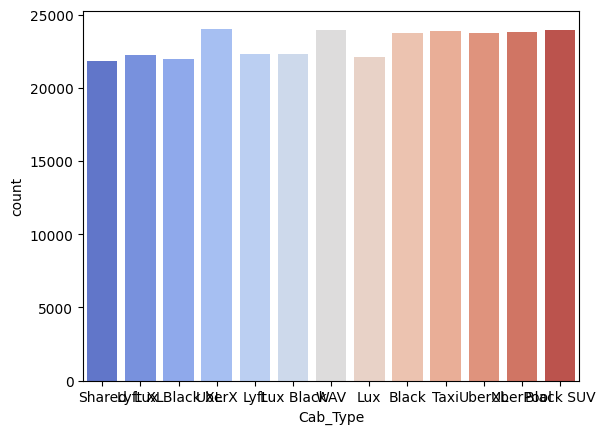

In [40]:
sns.countplot(x = 'Cab_Type', data = df, palette= 'coolwarm')
# The bar plot shows a more or less equal distribution of all cab types, with counts ranging close to 20,000–25,000
# indicating no strong preference for any specific cab type in the dataset

In [41]:
pd.crosstab(df['Cab_Type'], df['Destination'])
# Creates a cross-tabulation table to display the frequency of each cab type across various destinations
# useful for identifying patterns and relationships

Destination,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
Cab_Type,,,,,,,,,,,,
Black,1920,2125,1970,1972,1950,2063,1771,1959,1922,2105,2124,1853
Black SUV,1934,1821,1863,1944,2050,2050,2003,2128,1899,2162,1971,2139
Lux,1851,1916,1823,1782,1927,1941,1808,1800,1727,1845,1802,1917
Lux Black,2024,1740,1811,1914,1934,1914,1877,1676,1796,2010,1759,1858
Lux Black XL,1856,1739,1952,1789,2066,1800,1765,1797,1871,1811,1750,1761
Lyft,1770,1834,1812,1946,1828,2044,1949,1723,1809,1854,1907,1849
Lyft XL,1929,1636,1784,1875,2016,2023,1785,1906,1861,1812,1677,1971
Shared,1775,1700,1792,1981,1731,1797,1764,1838,1878,1954,1814,1805
Taxi,1950,1998,1895,2098,2200,1927,2029,1983,1867,2036,1996,1937


<Axes: xlabel='Source', ylabel='Cab_Type'>

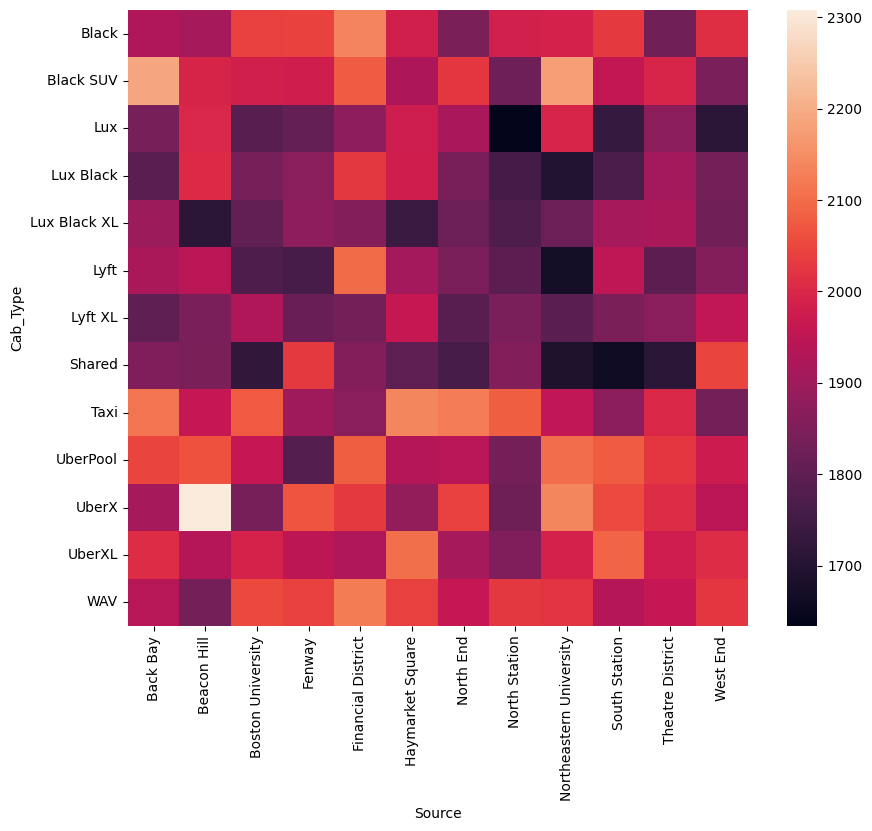

In [42]:
plt.figure(figsize = (10,8))
sns.heatmap(pd.crosstab(df['Cab_Type'], df['Source']))
# The heatmap shows an almost balanced distribution of cab types across sources, with frequencies generally ranging from 1700 to 2300.
# This indicates that no cab type or source significantly dominates, reflecting diverse ride preferences.

In [43]:
pd.crosstab(df['Destination'], df['Price'])

Price,2.5,3.0,3.5,4.5,5.0,5.5,6.0,6.5,7.0,7.5,...,65.0,67.5,68.0,73.5,75.0,80.0,80.5,81.5,89.0,92.0
Destination,,,,,,,,,,,,,,,,,,,,,
Back Bay,7,164,113,9,765,27,0,303,1929,661,...,0,0,0,0,0,0,0,0,0,0
Beacon Hill,0,165,120,4,355,0,1,70,1680,605,...,4,0,0,0,0,0,0,0,0,0
Boston University,0,78,85,0,391,25,0,101,1368,375,...,9,11,4,1,0,3,0,2,0,0
Fenway,1,164,123,0,323,26,7,140,1534,513,...,6,0,0,0,2,0,0,0,0,0
Financial District,29,242,279,150,518,136,61,192,2292,750,...,24,10,0,10,0,2,7,0,7,4
Haymarket Square,19,339,321,8,781,187,38,429,2958,1087,...,14,9,0,0,0,0,0,0,0,0
North End,4,343,281,0,667,133,14,326,2722,1203,...,0,5,0,0,9,0,0,0,0,0
North Station,9,234,200,15,504,156,23,332,2462,429,...,24,0,0,7,6,0,0,0,0,0
Northeastern University,1,157,138,0,320,3,0,111,1775,416,...,5,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Price', ylabel='Destination'>

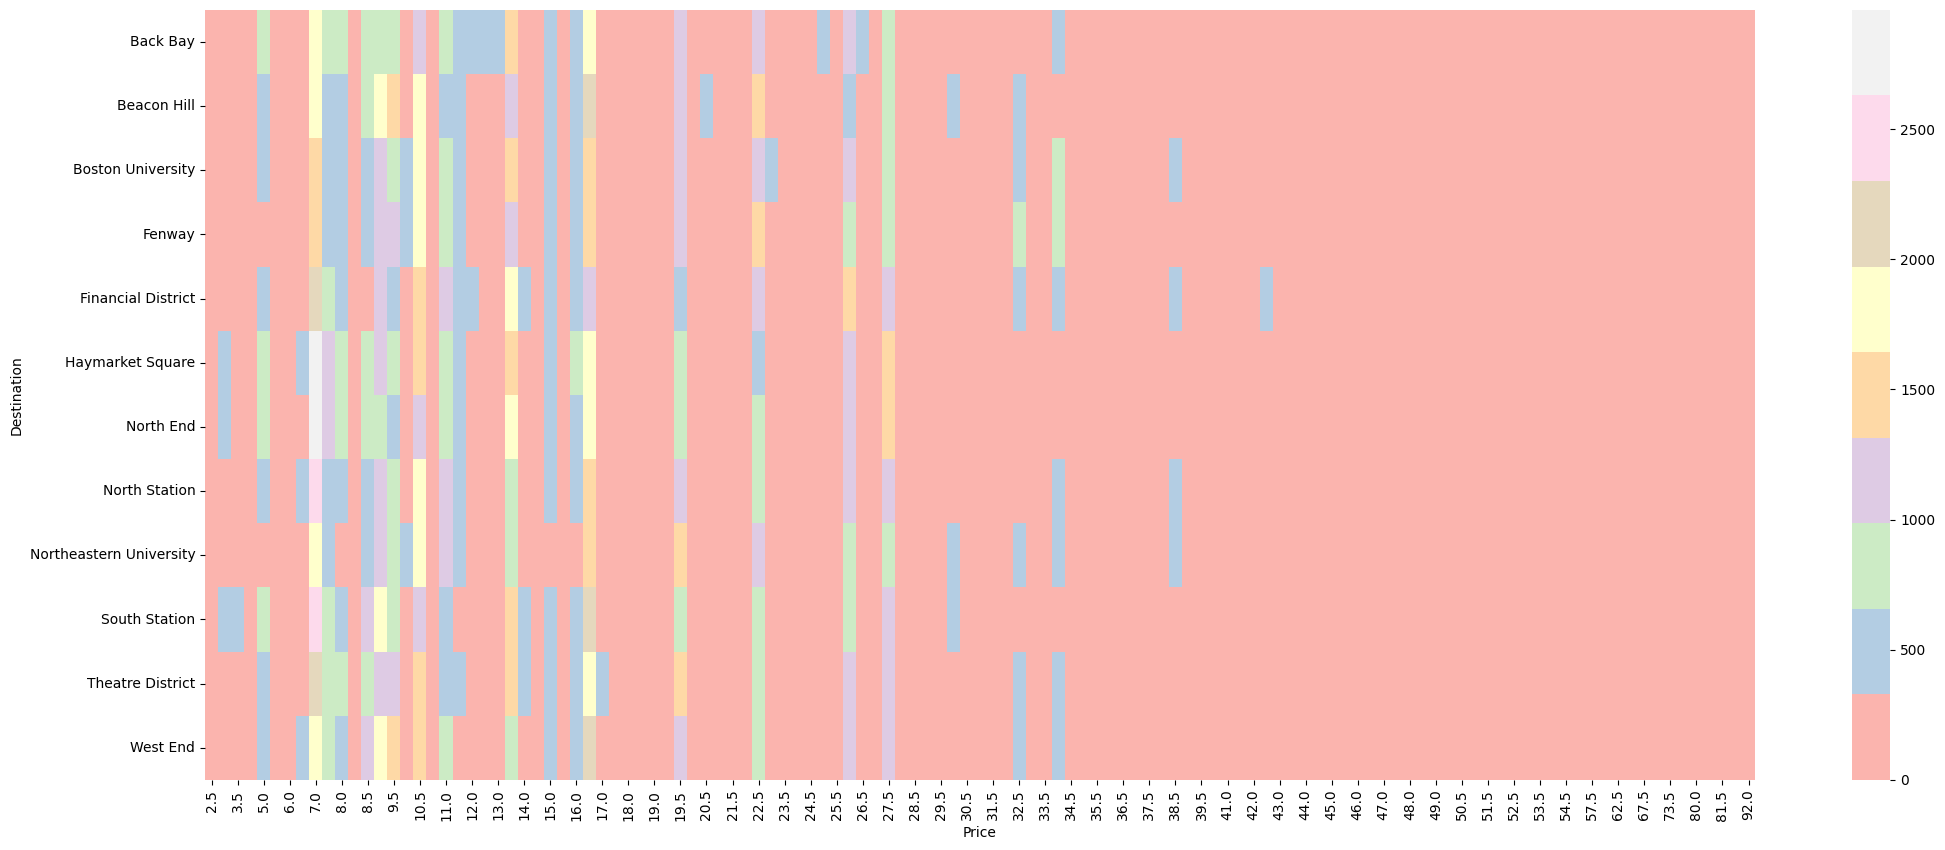

In [44]:
plt.figure(figsize = (25,10))
sns.heatmap(pd.crosstab(df['Destination'], df['Price']), cmap = 'Pastel1')
# The heatmap illustrates the relationship between destinations and ride prices, showing the frequency distribution of different price points across various destinations.
# Areas of higher intensity reveal destinations with specific price ranges occurring more frequently, aiding in identifying pricing patterns and trends.


<Axes: xlabel='Source'>

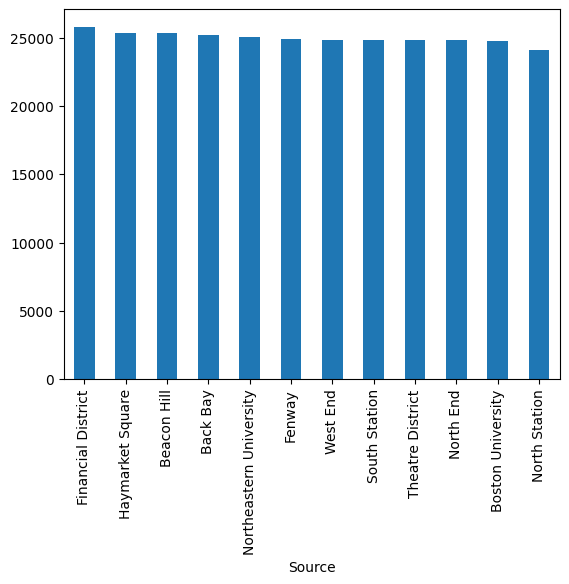

In [45]:
df['Source'].value_counts().plot(kind = 'bar')
# Creates a bar plot to visualize the frequency of occurrences for each source, revealing that counts for all sources are nearly uniform at around 25,000

<Axes: xlabel='Destination'>

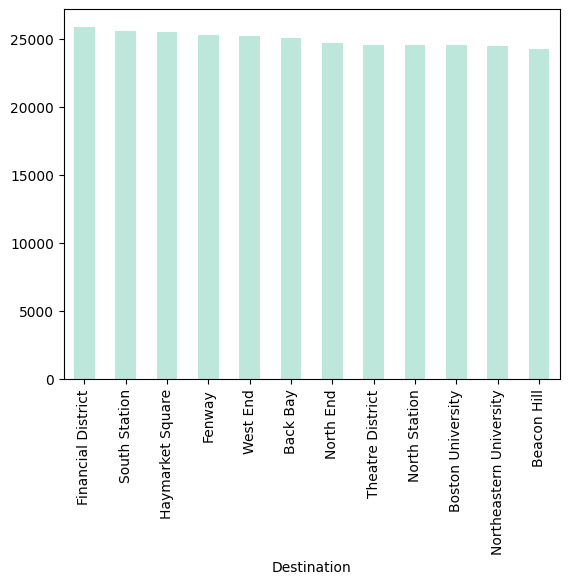

In [46]:
df['Destination'].value_counts().plot(kind = 'bar', cmap = 'icefire')
 # Creates a bar plot with the 'icefire' colormap, showing the frequency of destinations.
 # All destinations display a near-uniform count, close to 25,000, suggesting balanced ride distribution across locations.

<Axes: xlabel='Distance', ylabel='Price'>

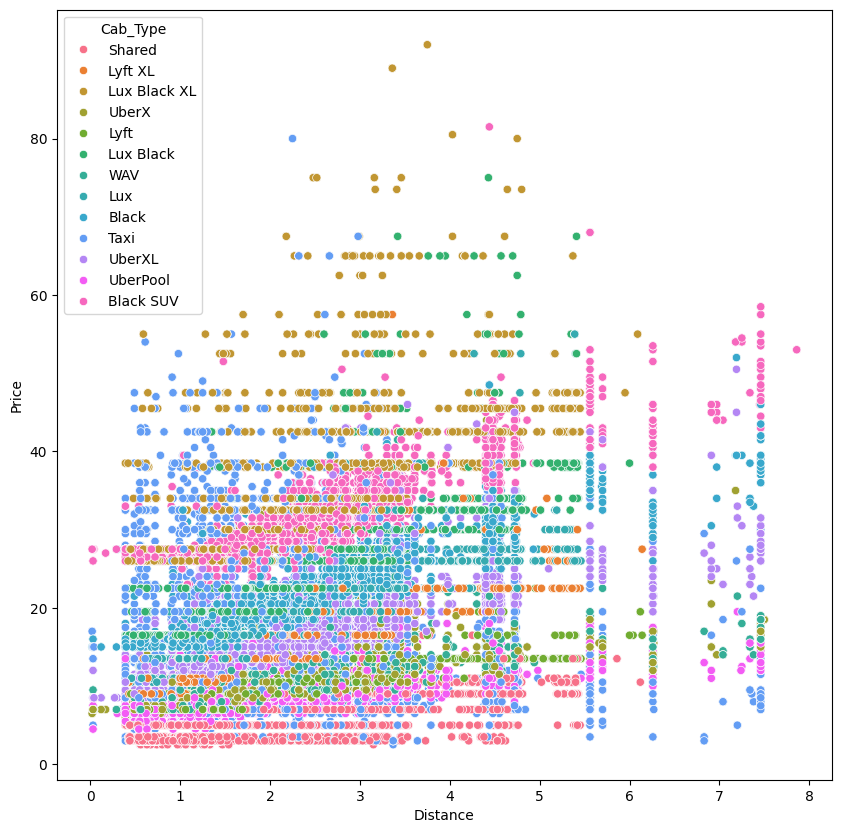

In [47]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Distance', y = 'Price', data = df, hue = 'Cab_Type')
 # Visualizes the relationship between 'Distance' and 'Price' with points color-coded by 'Cab_Type', showing price variations across distances and cab services

<Axes: xlabel='Temp', ylabel='Price'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


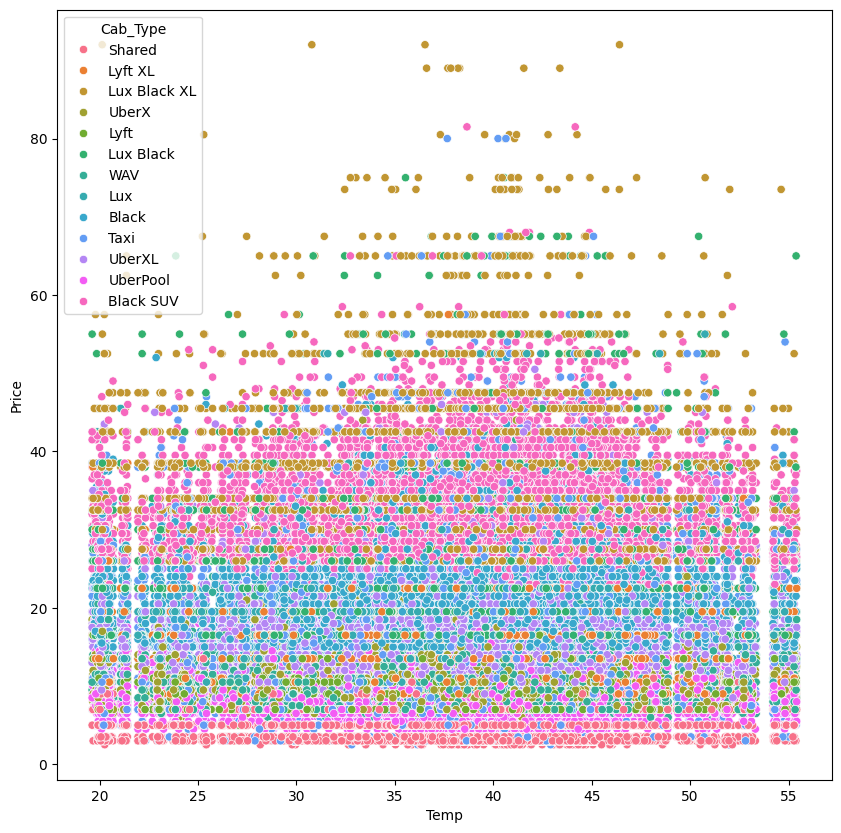

In [48]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Temp', y = 'Price', data = df, hue = 'Cab_Type')
 # Creates a scatter plot to analyze the relationship between temperature and price, with points color-coded by cab type to reveal variations in pricing trends across different cab services

<Axes: xlabel='Clouds', ylabel='Price'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


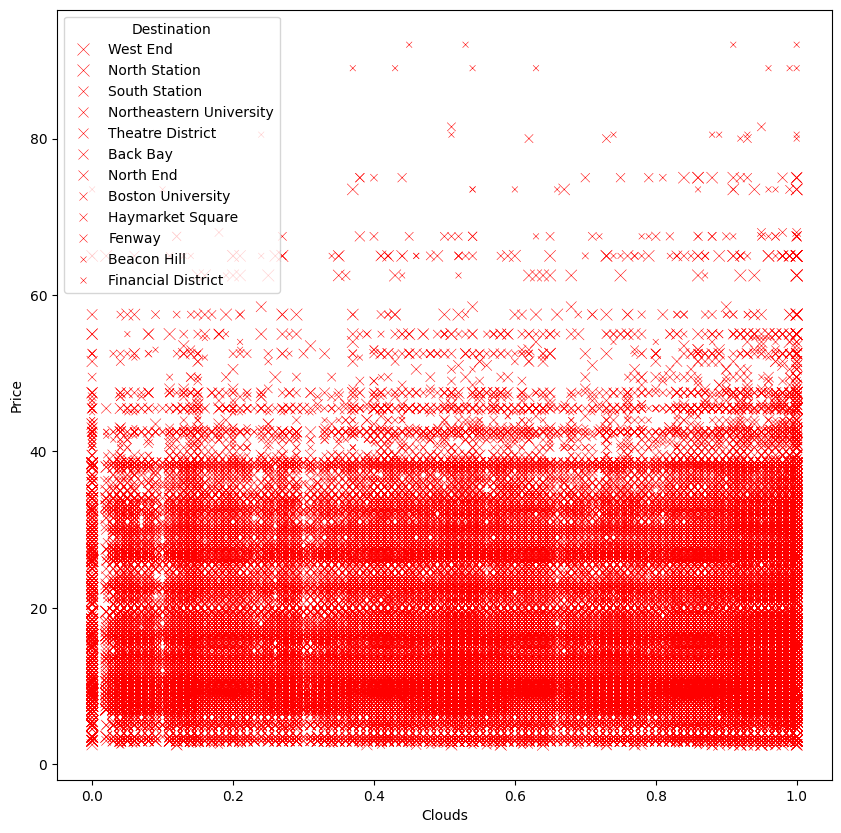

In [49]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Clouds', y = 'Price', data = df, size = 'Destination', color = 'Red', marker = 'x')
# Creates a scatter plot to visualize the relationship between 'Clouds' and 'Price', with marker sizes representing different destinations. The use of red 'x' markers provides a clear contrast for spotting trends or anomalies.

In [50]:
df['Cab_Type'].unique()
df['Cab_Type'].unique()  # Retrieves the unique categorical values in the 'Cab_Type' column, allowing review of original cab type categories in the dataset

array(['Shared', 'Lyft XL', 'Lux Black XL', 'UberX', 'Lyft', 'Lux Black',
       'WAV', 'Lux', 'Black', 'Taxi', 'UberXL', 'UberPool', 'Black SUV'],
      dtype=object)

In [51]:
df.head(3) # Displays the first 3-5 rows of the DataFrame to preview column names, data types, and sample values, helping identify which columns require preprocessing with a ColumnTransformer

,Distance,Time_stamp_x,Destination,Source,Price,Surge_multiplier,Cab_Type,Temp,Clouds,Pressure,Rain,Time_stamp_y,Humidity,Wind
11778379,2.78,1543525082110,West End,Fenway,10.5,1.0,Shared,28.67,0.27,1021.49,0.0,1544409634,0.60,5.02
8456629,0.58,1543256049895,North Station,Haymarket Square,9.0,1.0,Lyft XL,37.72,0.63,1001.80,0.0,1543481574,0.69,10.08
35139534,1.73,1544949909558,South Station,West End,26.0,1.0,Lux Black XL,40.84,0.87,1014.40,0.0,1543203644,0.93,1.52


In [52]:
CT = ColumnTransformer(transformers = [('OHE', OneHotEncoder(), ['Destination','Source']),
                                       ('OE', OrdinalEncoder(categories=[['Shared','UberPool','UberX','Lyft','Taxi',
                                       'WAV','UberXL','Lyft XL','Lux','Black','Black SUV','Lux Black','Lux Black XL']]), ['Cab_Type'])],
                       remainder = 'passthrough')

# This ColumnTransformer efficiently preprocesses categorical data by applying tailored transformations to specified columns.
# The Destination and Source columns are encoded using OneHotEncoder to convert categorical values into binary format, suitable for machine learning models.
# The Cab_Type column is transformed using OrdinalEncoder with a predefined hierarchy to represent cab types as ordered numerical values. The remainder='passthrough' ensures that all other columns are left unchanged.
# This preprocessing pipeline prepares the dataset for effective analysis and modeling.

In [53]:
x = df.drop('Price', axis = 1) # Creates a feature matrix by dropping the 'Price' column from the DataFrame, isolating predictor variables for modeling
y = df['Price']  # Extracts the 'Price' column as the target variable for predictive analysis

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size= 0.20, random_state= 42)
 # Splits the dataset into training and testing sets, with 80% for training and 20% for testing, ensuring reproducibility with the specified random_state

In [55]:
xtrain_scaled = CT.fit_transform(xtrain)  # Applies the ColumnTransformer to the training set, fitting and transforming categorical data while leaving numeric features untouched
xtest_scaled = CT.transform(xtest) # Transforms the test set using the fitted ColumnTransformer to ensure consistent preprocessing for prediction and evaluation

In [56]:
lr_model = LinearRegression()  # Initializes a Linear Regression model for predicting the target variable based on the features

In [57]:
x1 = pd.DataFrame(xtrain_scaled, columns = CT.get_feature_names_out()) #review scaled data before applying ML models

In [58]:
x1.head() #top 5 rows of scaled data

,OHE__Destination_Back Bay,OHE__Destination_Beacon Hill,OHE__Destination_Boston University,OHE__Destination_Fenway,OHE__Destination_Financial District,OHE__Destination_Haymarket Square,OHE__Destination_North End,OHE__Destination_North Station,OHE__Destination_Northeastern University,OHE__Destination_South Station,...,remainder__Distance,remainder__Time_stamp_x,remainder__Surge_multiplier,remainder__Temp,remainder__Clouds,remainder__Pressure,remainder__Rain,remainder__Time_stamp_y,remainder__Humidity,remainder__Wind
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.40,1.543665e+12,1.00,41.32,0.96,991.47,0.003,1.543428e+09,0.63,9.50
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.01,1.543466e+12,1.25,26.22,0.48,1010.12,0.000,1.545144e+09,0.47,13.74
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.71,1.543856e+12,1.00,37.74,0.46,999.00,0.000,1.543467e+09,0.70,9.69
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.40,1.544859e+12,1.00,37.97,0.55,991.86,0.000,1.543412e+09,0.69,6.53
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.72,1.544915e+12,1.00,41.31,0.81,990.57,0.000,1.543344e+09,0.76,12.00


In [59]:
lr_model.fit(xtrain_scaled, ytrain) # Trains the Linear Regression model using the scaled training data and corresponding target values

LinearRegression()

In [60]:
lr_pred = lr_model.predict(xtest_scaled) # Predicts target values for the scaled test set using the trained Linear Regression model, enabling evaluation of the model's performance

In [61]:
r2_score(ytest, lr_pred) # Calculates the R-squared metric to assess the proportion of variance in the target variable explained by the Linear Regression model's predictions

0.7225250657754855

In [62]:
mean_absolute_error(ytest, lr_pred)
#mean_absolute_error(ytest, lr_pred)  # Computes the Mean Absolute Error (MAE) to measure the average magnitude of errors in predictions, offering an intuitive evaluation of model accuracy in terms of the target variable's units

3.5560229371120444

In [63]:
mean_squared_error(ytest, lr_pred)
# Calculates the Mean Squared Error (MSE) to measure the average squared differences between predicted and actual values, emphasizing larger errors by penalizing them more strongly than MAE

23.804013478670317

In [64]:
root_mean_squared_error(ytest, lr_pred)
# Computes the Root Mean Squared Error (RMSE) to evaluate the model's performance by measuring the square root of the average squared prediction errors, giving an error metric in the same unit as the target variable

4.8789356911800255

In [65]:
lasso_model = Lasso()
# Initializes a Lasso Regression model, which applies L1 regularization to reduce overfitting by penalizing the absolute values of regression coefficients

In [66]:
lasso_model.fit(xtrain_scaled, ytrain)
# Trains the Lasso Regression model using the scaled training data and target values, optimizing feature selection by shrinking some coefficients to zero

Lasso()

In [67]:
Lasso_pred = lasso_model.predict(xtest_scaled)
# Predicts the target values for the scaled test set using the trained Lasso Regression model, providing insights while incorporating L1 regularization effects

In [68]:
r2_score(ytest, Lasso_pred)

0.6928369834502006

In [69]:
ridge_model = Ridge()
# Initializes a Ridge Regression model, which applies L2 regularization to reduce overfitting by penalizing the squared magnitude of regression coefficients

In [70]:
ridge_model.fit(xtrain_scaled, ytrain)
# Trains the Ridge Regression model using the scaled training data and target values, incorporating L2 regularization to improve model stability and reduce overfitting

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.83399e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [71]:
Ridge.pred = ridge_model.predict(xtest_scaled)
# Predicts the target values for the scaled test set using the trained Ridge Regression model, reflecting the influence of L2 regularization on predictions

In [72]:
r2_score(ytest, Ridge.pred)

0.7225261294562721

In [73]:
rf_model = RandomForestRegressor()
rf_model = RandomForestRegressor()  # Initializes a Random Forest Regressor, an ensemble learning method that combines multiple decision trees to improve predictive performance and reduce overfitting

In [74]:
rf_model.fit(xtrain_scaled, ytrain)
# Trains the Random Forest Regressor using the scaled training data and corresponding target values, building multiple decision trees to create an ensemble model for improved predictive performance

RandomForestRegressor()

In [75]:
rf_pred = rf_model.predict(xtest_scaled)
# Predicts the target values for the scaled test set using the trained Random Forest Regressor, leveraging its ensemble of decision trees for accurate and robust predictions

In [76]:
r2_score(ytest, rf_pred)
#An R-squared value of 0.93 from the Random Forest model indicates that the model explains 93% of the variance in the target variable (Price). This reflects excellent predictive performance and a strong fit to the test data.

0.9337456698088987

In [77]:
mean_squared_error(ytest, rf_pred)

5.683825003137571

In [78]:
root_mean_squared_error(ytest, rf_pred)

2.384077390341507

In [79]:
mean_absolute_error(ytest, rf_pred)

1.1365878413690476

In [80]:
Random_Forest_Result = pd.DataFrame({'Actual' : ytest, 'Predicted' : rf_pred}) #convert into a dataframe

<Axes: >

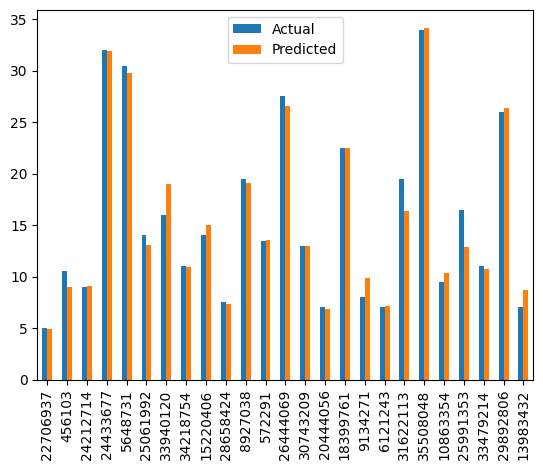

In [81]:
Random_Forest_Result.sample(25).plot(kind = 'bar') # Creates a bar plot to visually compare a random sample of 25 actual and predicted values, highlighting the Random Forest model's performance and any discrepancies

In [82]:
xgb_reg1 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
# Initializes an XGBoost Regressor with 100 estimators, a learning rate of 0.1, and a maximum tree depth of 6, balancing predictive power and model complexity

In [83]:
xgb_reg1.fit(xtrain_scaled, ytrain)
# Trains the XGBoost Regressor on the scaled training data and target values, utilizing gradient boosting to optimize predictive performance

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
xgb_reg1_pred = xgb_reg1.predict(xtest_scaled)
# Generates predictions for the scaled test set using the trained XGBoost Regressor, leveraging gradient boosting for accurate and robust forecasting

In [85]:
r2_score(ytest, xgb_reg1_pred)
# Calculates the R-squared metric to evaluate the XGBoost Regressor's performance, indicating the proportion of variance in the target variable explained by the model's predictions\

0.8929859254271891

In [86]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=10)
# hyperparameter tuning by increasing the learning rate to 0.2 and the maximum depth to 10, aiming to enhance the model's performance by capturing more complex patterns

In [87]:
xgb_reg.fit(xtrain_scaled, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [89]:
xgb_pred = xgb_reg.predict(xtest_scaled)

In [90]:
r2_score(ytest, xgb_pred)
# R-squared metric for the tuned XGBoost Regressor, showing an increased score of 0.92 after hyperparameter tuning, which demonstrates enhanced model performance

0.9208272982389362

In [91]:
xgb_res = pd.DataFrame({'Actual' : ytest, 'Predicted' : xgb_pred})

<Axes: >

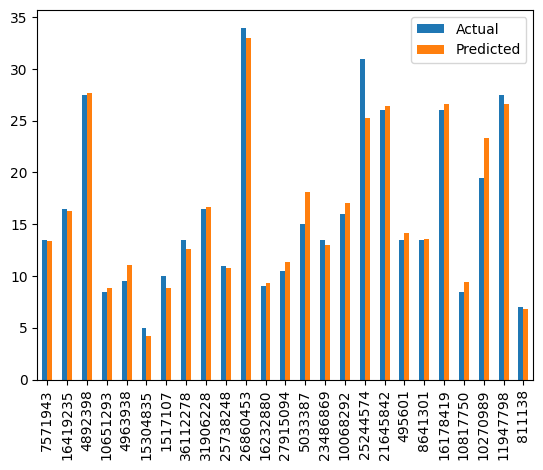

In [92]:
xgb_res.sample(25).plot(kind = 'bar')

In [93]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest', 'XGBoost']

predictions = {
    'Linear Regression': lr_model.predict(xtest_scaled),
    'Lasso Regression': lasso_model.predict(xtest_scaled),
    'Ridge Regression': ridge_model.predict(xtest_scaled),
    'Random Forest': rf_model.predict(xtest_scaled),
    'XGBoost': xgb_reg.predict(xtest_scaled)
    }

results = []

for model_name, y_pred in predictions.items():
    r2 = r2_score(ytest, y_pred)
    mse = mean_squared_error(ytest, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(ytest, y_pred)

    results.append({
        'Model': model_name,
        'R² Score': r2,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error': mae
    })

metrics_df = pd.DataFrame(results)

In [94]:
metrics_df

,Model,R² Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,Linear Regression,0.722525,23.804013,4.878936,3.556023
1,Lasso Regression,0.692837,26.350894,5.133312,3.613894
2,Ridge Regression,0.722526,23.803922,4.878926,3.556007
3,Random Forest,0.933746,5.683825,2.384077,1.136588
4,XGBoost,0.920827,6.792066,2.606159,1.374029


# Summarizes the performance metrics for multiple regression models,
# including Linear Regression, Lasso Regression, Ridge Regression, Random Forest, and XGBoost.
# The table compares key metrics such as R² Score, Mean Squared Error (MSE),
# Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).
# Random Forest demonstrates the highest predictive accuracy (R² = 0.93) with the lowest errors,
# followed by XGBoost (R² = 0.92) which also shows strong performance.
# Linear Regression and Ridge Regression yield comparable metrics (R² = 0.72) but are notably
# less effective compared to Random Forest and XGBoost. Lasso Regression has the lowest performance.